### inspired by https://www.youtube.com/watch?v=CUlRmRu43u4

In [114]:
import pandas as pd
import yfinance as yf
import datetime
import os
import ta
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA

In [4]:
tickers = [
    'BTC-USD',
    'ETH-USD',
    'BNB-USD',
    'ADA-USD',
    'USDT-USD',
    'SOL1-USD',
    'XRP-USD',
    'HEX-USD',
    'DOT1-USD',
    'USDC-USD',
    'DOGE-USD',
    'LUNA1-USD',
    'UNI3-USD',
    'AVAX-USD',
    'LINK-USD',
    'LTC-USD',
    'BCH-USD',
    'ALGO-USD',
    'SHIB-USD',
    'MATIC-USD',
    'XLM-USD',
    'VET-USD',
    'ICP1-USD',
    'ATOM1-USD',
    'FTT1-USD'
]

In [51]:
start_date = (datetime.datetime.now() - datetime.timedelta(59)).strftime('%Y-%m-%d')

In [52]:
dfs = []
for ticker in tickers:
    df = yf.download(ticker, start=start_date, interval='30m')[['Open', 'High', 'Low', 'Close', 'Volume']]
    ta.add_all_ta_features(
        df,
        open='Open',
        high='High',
        low='Low',
        close='Close',
        volume='Volume'
    )
    dfs.append(df)

[*********************100%***********************]  1 of 1 completed


c:\projekte\finance-with-python\venv\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
c:\projekte\finance-with-python\venv\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [96]:
for df, ticker in zip(dfs, tickers):
    df['Symbol'] = ticker
    df['Return'] = df['Close'] / df['Open']

In [98]:
ta_df = pd.concat(dfs)

In [99]:
relevant_cols = [
    'volume_cmf',
    'volume_mfi',
    'volatility_dcp',
    'trend_psar_down_indicator',
    'trend_psar_up_indicator',
    'trend_stc',
    'momentum_rsi',
    'momentum_stoch_rsi',
    'momentum_stoch_rsi_k',
    'momentum_stoch_rsi_d',
    'momentum_stoch',
    'Symbol',
    'Return'
]
ta_df = ta_df[relevant_cols]
ta_df.dropna(inplace=True)
ta_df

,volume_cmf,volume_mfi,volatility_dcp,trend_psar_down_indicator,trend_psar_up_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_stoch,Symbol,Return
Datetime,,,,,,,,,,,,,
2021-09-08 10:30:00+01:00,0.238297,40.805625,0.597076,0.0,0.0,44.515595,46.547010,1.000000,1.000000,0.676363,63.993266,BTC-USD,1.003549
2021-09-08 11:00:00+01:00,0.189470,39.917895,0.551749,0.0,0.0,64.070463,45.217999,0.934987,0.978329,0.881665,67.949081,BTC-USD,0.996189
2021-09-08 11:30:00+01:00,0.253356,52.209932,0.694445,0.0,0.0,81.615639,50.052920,1.000000,0.978329,0.985553,85.522442,BTC-USD,1.008666
2021-09-08 12:00:00+01:00,0.285862,54.275195,0.755351,0.0,0.0,90.807819,52.000170,1.000000,0.978329,0.978329,94.314222,BTC-USD,1.003630
2021-09-08 12:30:00+01:00,0.253920,54.747981,0.703876,0.0,0.0,95.403910,50.218221,0.931186,0.977062,0.977907,89.766892,BTC-USD,0.997290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05 12:30:00+00:00,0.225956,55.252047,0.196935,0.0,0.0,3.124983,44.034904,0.137004,0.045668,0.015223,19.693539,FTT1-USD,1.004012
2021-11-05 13:00:00+00:00,0.225406,57.380701,0.308993,0.0,0.0,1.562492,47.150161,0.352660,0.163221,0.069630,32.885637,FTT1-USD,1.002811
2021-11-05 13:30:00+00:00,0.118424,61.031247,0.513422,0.0,0.0,3.908505,52.360131,0.675164,0.388276,0.199055,57.232261,FTT1-USD,1.004915


<AxesSubplot:>

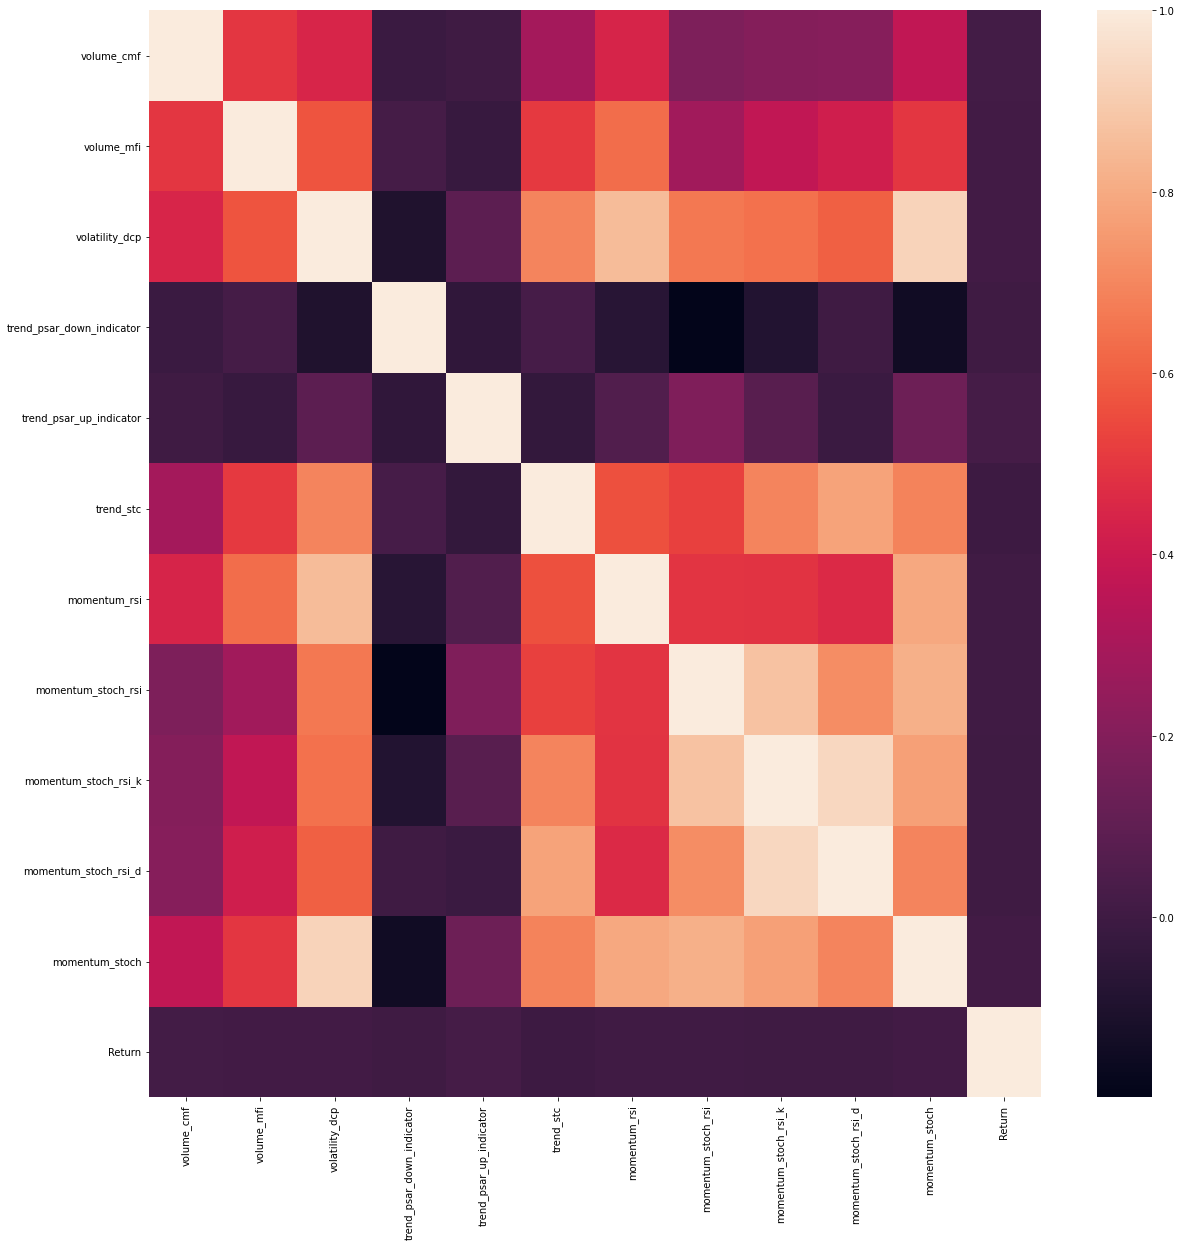

In [90]:
plt.figure(figsize=(20,20))
sb.heatmap(ta_df.corr())

In [104]:
indicators =  ta_df[relevant_cols[:-2]]
ta_df[relevant_cols[:-2]] = (indicators -  indicators.min()) / (indicators.max() - indicators.min())

In [105]:
ta_df

,volume_cmf,volume_mfi,volatility_dcp,trend_psar_down_indicator,trend_psar_up_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_stoch,Symbol,Return
Datetime,,,,,,,,,,,,,
2021-09-08 10:30:00+01:00,0.574882,0.408056,0.597076,0.0,0.0,0.445156,0.490808,1.000000,1.000000,0.676363,0.639933,BTC-USD,1.003549
2021-09-08 11:00:00+01:00,0.546950,0.399179,0.551749,0.0,0.0,0.640705,0.476603,0.934987,0.978329,0.881665,0.679491,BTC-USD,0.996189
2021-09-08 11:30:00+01:00,0.583497,0.522099,0.694445,0.0,0.0,0.816156,0.528280,1.000000,0.978329,0.985553,0.855224,BTC-USD,1.008666
2021-09-08 12:00:00+01:00,0.602093,0.542752,0.755351,0.0,0.0,0.908078,0.549092,1.000000,0.978329,0.978329,0.943142,BTC-USD,1.003630
2021-09-08 12:30:00+01:00,0.583820,0.547480,0.703876,0.0,0.0,0.954039,0.530047,0.931186,0.977062,0.977907,0.897669,BTC-USD,0.997290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05 12:30:00+00:00,0.567823,0.552520,0.196935,0.0,0.0,0.031250,0.463958,0.137004,0.045668,0.015223,0.196935,FTT1-USD,1.004012
2021-11-05 13:00:00+00:00,0.567508,0.573807,0.308993,0.0,0.0,0.015625,0.497254,0.352660,0.163221,0.069630,0.328856,FTT1-USD,1.002811
2021-11-05 13:30:00+00:00,0.506307,0.610312,0.513422,0.0,0.0,0.039085,0.552940,0.675164,0.388276,0.199055,0.572323,FTT1-USD,1.004915


In [172]:
pca = PCA(n_components=2)
X = pd.DataFrame(pca.fit_transform(ta_df[relevant_cols[:-2]]), columns=['pca1', 'pca2'])
X

,pca1,pca2
0,-0.481738,-0.498567
1,-0.616491,-0.342931
2,-0.910206,-0.252937
3,-1.013739,-0.198838
4,-0.972547,-0.126805
...,...,...
68411,0.969482,0.034538
68412,0.731716,-0.133662
68413,0.288436,-0.375160
68414,0.194809,-0.367244


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

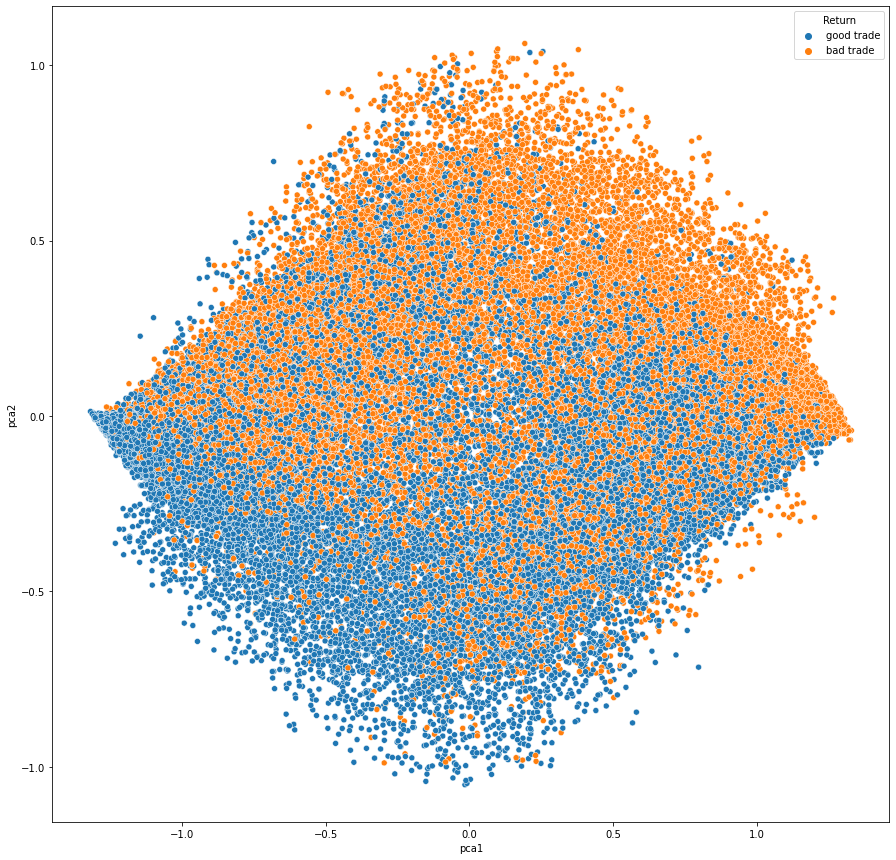

In [139]:
hue = (ta_df['Return'] > 1).reset_index()['Return'].map({True: 'good trade', False: 'bad trade'})
plt.figure(figsize=(15,15))
sb.scatterplot(x=X['pca1'], y=X['pca2'], hue=hue)

In [140]:
ta_df

,volume_cmf,volume_mfi,volatility_dcp,trend_psar_down_indicator,trend_psar_up_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_stoch,Symbol,Return
Datetime,,,,,,,,,,,,,
2021-09-08 10:30:00+01:00,0.574882,0.408056,0.597076,0.0,0.0,0.445156,0.490808,1.000000,1.000000,0.676363,0.639933,BTC-USD,1.003549
2021-09-08 11:00:00+01:00,0.546950,0.399179,0.551749,0.0,0.0,0.640705,0.476603,0.934987,0.978329,0.881665,0.679491,BTC-USD,0.996189
2021-09-08 11:30:00+01:00,0.583497,0.522099,0.694445,0.0,0.0,0.816156,0.528280,1.000000,0.978329,0.985553,0.855224,BTC-USD,1.008666
2021-09-08 12:00:00+01:00,0.602093,0.542752,0.755351,0.0,0.0,0.908078,0.549092,1.000000,0.978329,0.978329,0.943142,BTC-USD,1.003630
2021-09-08 12:30:00+01:00,0.583820,0.547480,0.703876,0.0,0.0,0.954039,0.530047,0.931186,0.977062,0.977907,0.897669,BTC-USD,0.997290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05 12:30:00+00:00,0.567823,0.552520,0.196935,0.0,0.0,0.031250,0.463958,0.137004,0.045668,0.015223,0.196935,FTT1-USD,1.004012
2021-11-05 13:00:00+00:00,0.567508,0.573807,0.308993,0.0,0.0,0.015625,0.497254,0.352660,0.163221,0.069630,0.328856,FTT1-USD,1.002811
2021-11-05 13:30:00+00:00,0.506307,0.610312,0.513422,0.0,0.0,0.039085,0.552940,0.675164,0.388276,0.199055,0.572323,FTT1-USD,1.004915


### Machine Learning

In [163]:
y

Datetime
2021-09-08 10:30:00+01:00    1.003549
2021-09-08 11:00:00+01:00    0.996189
2021-09-08 11:30:00+01:00    1.008666
2021-09-08 12:00:00+01:00    1.003630
2021-09-08 12:30:00+01:00    0.997290
                               ...   
2021-11-05 12:30:00+00:00    1.004012
2021-11-05 13:00:00+00:00    1.002811
2021-11-05 13:30:00+00:00    1.004915
2021-11-05 14:00:00+00:00    0.997707
2021-11-05 14:30:00+00:00    0.996070
Name: Return, Length: 68416, dtype: float64

In [173]:
# shift, since we need to protect then next time period
y = ta_df['Return'].reset_index()['Return'].shift(-1)[:-1]
X = X[:-1]

In [178]:
from sklearn.metrics import mean_squared_error

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [180]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
mean_squared_error(y_val, reg.predict(X_val))

0.19225282210122213

In [182]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train, y_train)
mean_squared_error(y_val, regr.predict(X_val))

9.044413240226674e-05